In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
#from google.colab import drive
#drive.mount("/content/drive")
data = pd.read_csv('winequality-red.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Data Visuasalisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


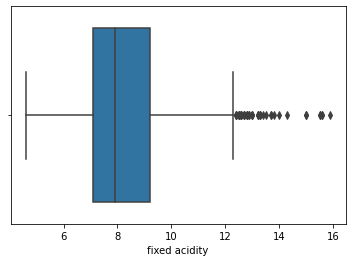

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


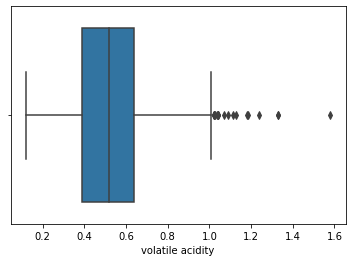

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


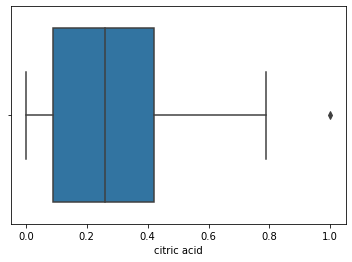

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


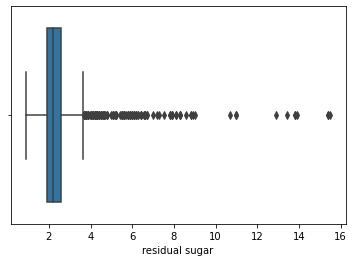

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


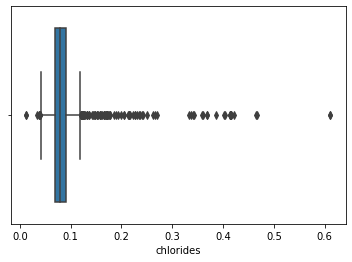

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


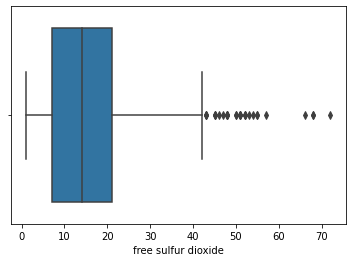

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


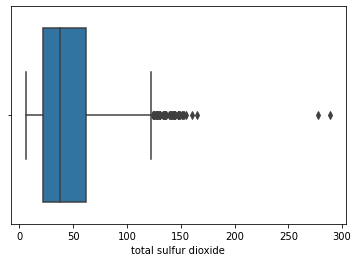

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


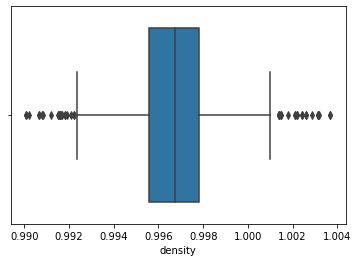

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


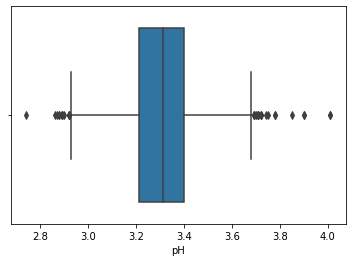

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


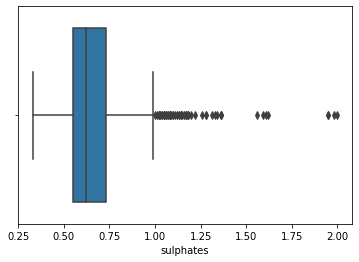

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


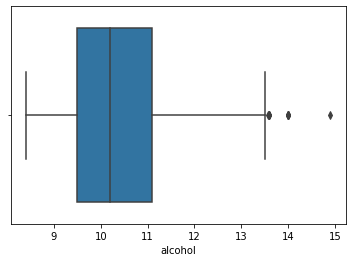

In [28]:
for t in features:
  sns.boxplot(data[t])
  plt.show()

As we can observe that there are several outliers in each of the attributes.

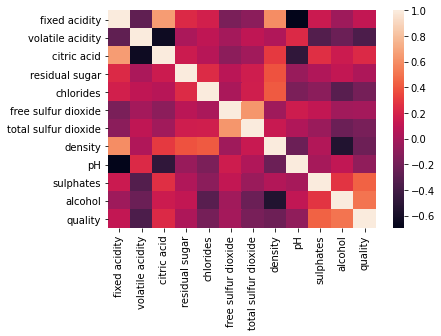

In [47]:
sns.heatmap(data.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


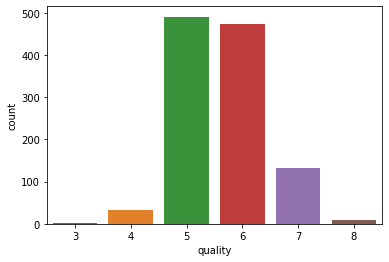

In [48]:
sns.countplot(data.quality)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e56632290>,
      dtype=object)

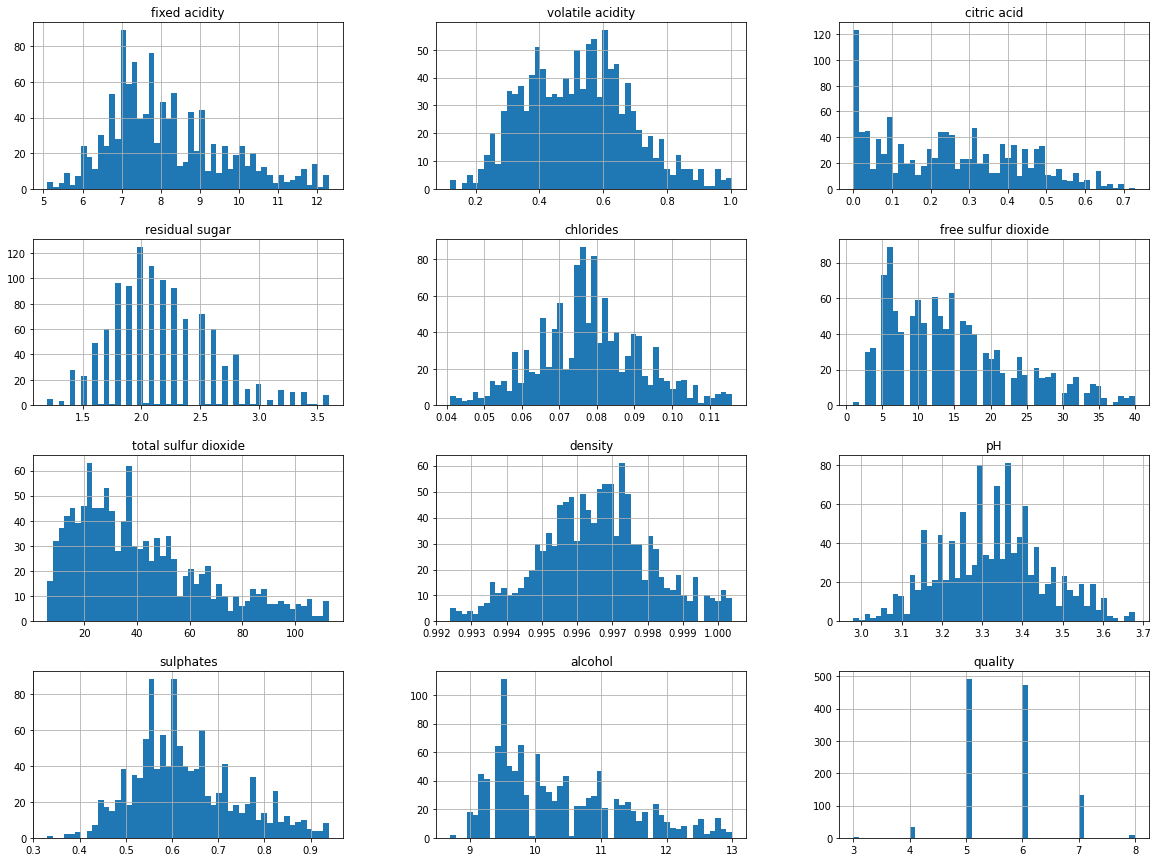

In [49]:
data.hist(figsize=(20,15),bins=50)

Data Exploraton

In [8]:
print (data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
print(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Correlation With Quality

In [45]:
data.corrwith(data["quality"])

fixed acidity           0.118603
volatile acidity       -0.354012
citric acid             0.232693
residual sugar          0.032161
chlorides              -0.191871
free sulfur dioxide    -0.006601
total sulfur dioxide   -0.178241
density                -0.219397
pH                     -0.080433
sulphates               0.436876
alcohol                 0.504948
quality                 1.000000
dtype: float64

Outlier Removal

In [32]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


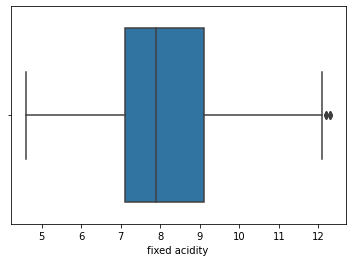

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


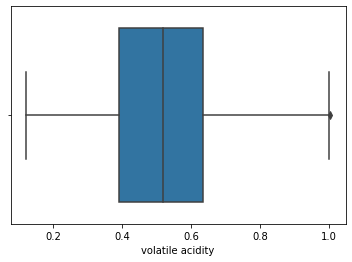

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


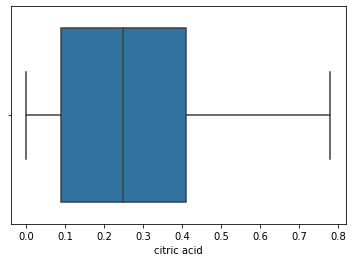

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


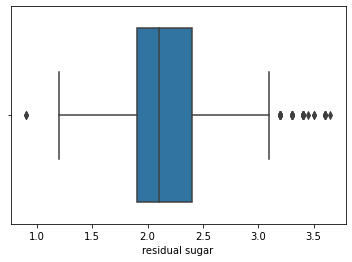

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


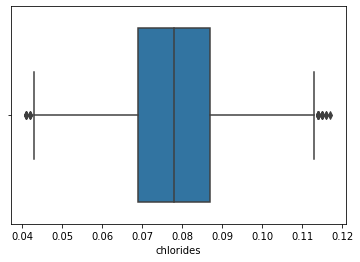

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


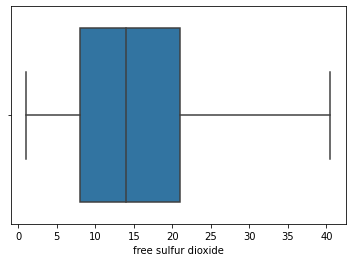

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


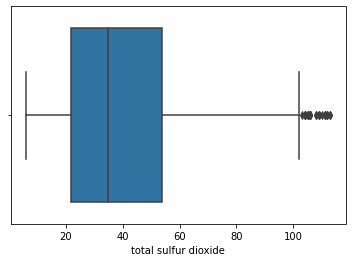

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


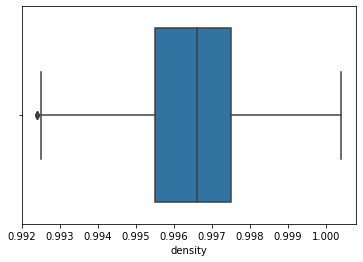

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


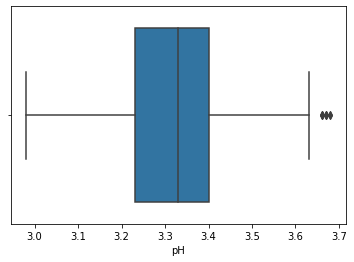

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


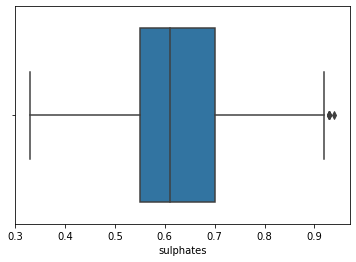

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


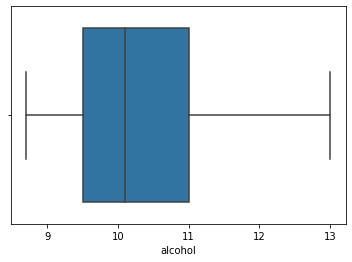

In [33]:
for t in features:
  drop_outliers(data,t)
  sns.boxplot(data[t])
  plt.show()

Train-Test Split

In [50]:
#Dropping Residual Sugar as well due to low correlation
fl = ['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = data[features].copy()
y = data.quality.copy()

Data Normalization

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_normalized = sc.fit_transform(X)

df_normalized

array([[-0.50781513,  1.06768423, -1.35916949, ...,  1.40710982,
        -0.60988091, -0.9998679 ],
       [-0.2316933 ,  2.15510023, -1.35916949, ..., -0.96613944,
         0.45480801, -0.58637293],
       [-0.2316933 ,  1.43015623, -1.13737525, ..., -0.50680087,
         0.18863578, -0.58637293],
       ...,
       [-1.26715018, -0.08014377, -0.6383382 , ...,  0.71810197,
         1.07587655,  0.654112  ],
       [-1.54327201,  0.73541823, -0.69378677, ...,  1.86644839,
         0.72098024, -0.17287795],
       [-1.47424155, -1.28838376,  1.24691286, ...,  0.48843269,
         0.27735985,  0.654112  ]])

In [66]:
X_train,X_valid,y_train_,y_valid = train_test_split(df_normalized,y,train_size=0.8,test_size=0.2,random_state=5)

Multi-layer Perceptron Classifier

In [67]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',max_iter= 1000, alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train,y_train_)
predict = clf.predict(X_valid)
print (clf.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,predict)))

0.6419213973799127
MAE = 0.39737991266375544


Random Forest Classifier

In [68]:
rfc=RandomForestClassifier(n_estimators=200,random_state=5)
rfc.fit(X_train,y_train_)
predict = rfc.predict(X_valid)
print (rfc.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,predict)))

0.7641921397379913
MAE = 0.27074235807860264



Support Vector Classifier

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
svc = SVC()
svc.fit(X_train, y_train_)
pred_svc = svc.predict(X_valid)
print (svc.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,pred_svc)))

0.6681222707423581
MAE = 0.37554585152838427


In [70]:
#Finding best parameters for the SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [71]:
grid_svc.fit(X_train, y_train_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [72]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.9, 'kernel': 'rbf'}

In [75]:
#Let's run our SVC again with the best parameters.
from sklearn.metrics import classification_report
svc2 = SVC(C = 1.3, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train_)
pred_svc2 = svc2.predict(X_valid)
print(svc2.score(X_valid,y_valid))

0.7074235807860262


KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size= 10, n_neighbors= 1, p =1, weights= 'uniform')
knn.fit(X_train, y_train_)
pred_knn = knn.predict(X_valid)
print (knn.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,pred_knn)))

0.6462882096069869
MAE = 0.4017467248908297


As evident, all models in current state, even after preprocessing, outlier analysis and standardization achieve accuracies between 64.19% to 76.42%.

**Preprocessing Data**

Converting the classification problem

Using Bins to convert the classification problem into a binary classification Problem.

In [77]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [79]:
#Now lets assign a labels to our quality variable
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

We will make 'Bad" wine = 0 and 'Good' wine = 1

In [80]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [81]:
data['quality'].value_counts()

0    999
1    143
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


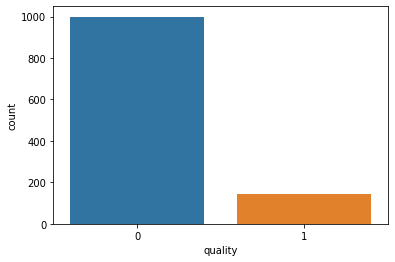

In [82]:
sns.countplot(data['quality'])

In [83]:
#Dropping Residual Sugar as well due to low correlation
fl = ['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = data[features].copy()
y = data.quality.copy()

In [85]:
df_normalized = sc.fit_transform(X)

df_normalized

array([[-0.50781513,  1.06768423, -1.35916949, ...,  1.40710982,
        -0.60988091, -0.9998679 ],
       [-0.2316933 ,  2.15510023, -1.35916949, ..., -0.96613944,
         0.45480801, -0.58637293],
       [-0.2316933 ,  1.43015623, -1.13737525, ..., -0.50680087,
         0.18863578, -0.58637293],
       ...,
       [-1.26715018, -0.08014377, -0.6383382 , ...,  0.71810197,
         1.07587655,  0.654112  ],
       [-1.54327201,  0.73541823, -0.69378677, ...,  1.86644839,
         0.72098024, -0.17287795],
       [-1.47424155, -1.28838376,  1.24691286, ...,  0.48843269,
         0.27735985,  0.654112  ]])

In [86]:
X_train,X_valid,y_train_,y_valid = train_test_split(df_normalized,y,train_size=0.8,test_size=0.2,random_state=5)

Random Forest Classifier

In [87]:
rfc=RandomForestClassifier(n_estimators=200,random_state=5)
rfc.fit(X_train,y_train_)
predict = rfc.predict(X_valid)
print (rfc.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,predict)))

0.9475982532751092
MAE = 0.05240174672489083


Support Vector Classifier

In [88]:
svc = SVC()
svc.fit(X_train, y_train_)
pred_svc = svc.predict(X_valid)
print (svc.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,pred_svc)))

0.8908296943231441
MAE = 0.1091703056768559


In [89]:
#Finding best parameters for the SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [90]:
grid_svc.fit(X_train, y_train_)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [91]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

In [92]:
#Let's run our SVC again with the best parameters.
from sklearn.metrics import classification_report
svc2 = SVC(C = 1.2, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train_)
pred_svc2 = svc2.predict(X_valid)
print(svc2.score(X_valid,y_valid))

0.9213973799126638


KNN Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size= 10, n_neighbors= 1, p =1, weights= 'uniform')
knn.fit(X_train, y_train_)
pred_knn = knn.predict(X_valid)
print (knn.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,pred_knn)))

0.9039301310043668
MAE = 0.09606986899563319


In [97]:
parameters = {
    'n_neighbors': [1,3,5,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean','manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, verbose = 1,cv=3 ,n_jobs= -1)

In [98]:
gs.fit(X_train, y_train_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [99]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

In [104]:
knn2 = KNeighborsClassifier(n_neighbors= 11, p =1, weights= 'distance',metric= 'euclidean')
knn2.fit(X_train, y_train_)
pred_knn2 = knn2.predict(X_valid)
print (knn2.score(X_valid,y_valid))
print('MAE = '+str(mean_absolute_error(y_valid,pred_knn2)))

0.9344978165938864
MAE = 0.06550218340611354


As seen, KNN is able to achive the best accuracy of 93.45% after applying grid search. (This may also be due to the high class imbalance of quality)